Hello World, welcome to my Data Science Cookbook. This is a reflection in a nutshell of what I have learned from my Intro to Data Science class. 

In [63]:
#Lets start with the basics or basics== Importing libraries 

import requests
import json
from bs4 import BeautifulSoup

from urllib.parse import unquote, quote
from datetime import datetime

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# Pandas dataframe on the changes in the mortality rate data imported from Our World In Data

#to create a dataframe you would need a csv file for it to read and construct a table representation of it.

#the syntax include: pd.read_csv('')

mortality_df= pd.read_csv('relative-change-in-maternal-mortality.csv').dropna() #dropna() drops all the Null values to avoid confusion and also clean data.
mortality_df

,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
2,Afghanistan,AFG,2015,-70.447761,Asia
5,Albania,ALB,2015,-59.154930,Europe
7,Algeria,DZA,2015,-35.185185,Africa
11,Angola,AGO,2015,-58.879310,Africa
18,Argentina,ARG,2015,-27.777778,South America
...,...,...,...,...,...
541,Venezuela,VEN,2015,1.063830,South America
543,Vietnam,VNM,2015,-61.151079,Asia
551,Yemen,YEM,2015,-29.616088,Asia
556,Zambia,ZMB,2015,-61.178510,Africa


In [73]:
#some simple inbuilt operations to know more about your data
print(mortality_df.min())
print()
print(mortality_df.max())
print()
print(mortality_df.info())
print()
print(mortality_df.describe())
print()
print(mortality_df.value_counts())


Entity                                                    Afghanistan
Code                                                              AFG
Year                                                             2015
Relative change in maternal mortality ratio since 1990     -89.955687
Continent                                                      Africa
dtype: object

Entity                                                         Zimbabwe
Code                                                                ZWE
Year                                                               2015
Relative change in maternal mortality ratio since 1990        73.913043
Continent                                                 South America
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 2 to 559
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  ----------

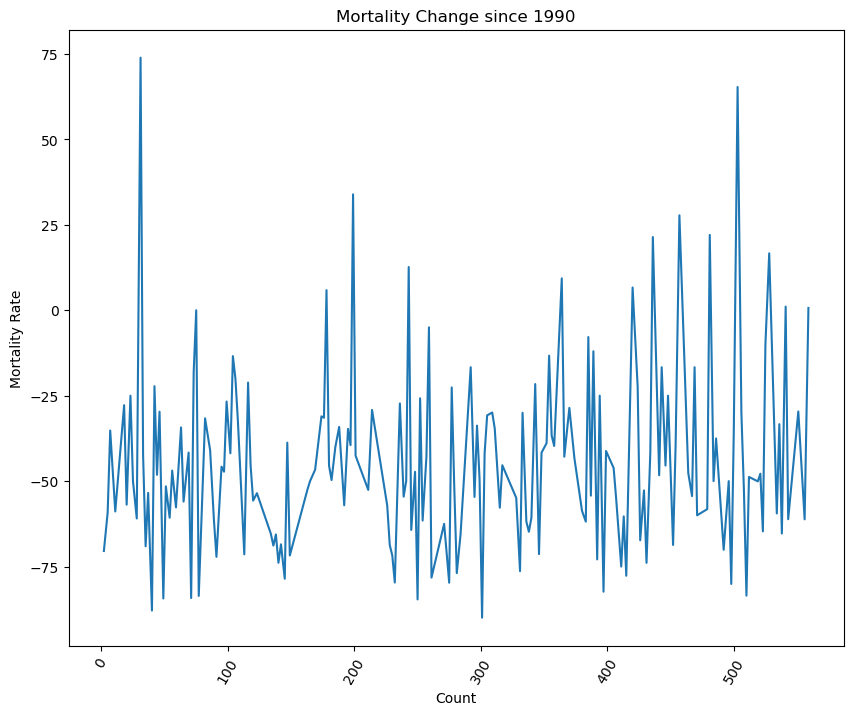

In [95]:
#simple scatter plot

#first assignt he figure size and the axes point for the scatter plot
fig, axs = plt.subplots(figsize=(10, 8))

#then get the column you would want to represnt mainly in your scatter plot
#after that get the kind of line you would want (i.e: line/dash...), and the rot if the angle of your tick lable. 
#ax is for the axes object on whihc your plot is created

mortality_df['Relative change in maternal mortality ratio since 1990'].plot(kind='line', rot=60, ax=axs)

#declaring your lables and titles
plt.xlabel("Count")  # custom x label using Matplotlib

plt.ylabel("Mortality Rate")
plt.title('Mortality Change since 1990')

#to print your graph
plt.show()

In [92]:
#creating a pivot table for the mortality dataframe to anylyz and summarize the datasets

#syntax: pd.pivot_table()

#name of your dataframe
#the main value that you want to create the graph on 
#the index of the graoh in whihc you want the values to be dedicated to
#column: to get the year column
mortality_pv= pd.pivot_table(mortality_df, values= 'Relative change in maternal mortality ratio since 1990', index='Entity',columns='Year')
mortality_pv.dropna()

Year,2015
Entity,
Afghanistan,-70.447761
Albania,-59.154930
Algeria,-35.185185
Angola,-58.879310
Argentina,-27.777778
...,...
Venezuela,1.063830
Vietnam,-61.151079
Yemen,-29.616088


In [60]:
#focusing mainly on Asia
df_Asia= mortality_df[mortality_df["Continent"]=='Asia'].dropna()
df_Asia

,Entity,Code,Year,Relative change in maternal mortality ratio since 1990,Continent
2,Afghanistan,AFG,2015,-70.447761,Asia
20,Armenia,ARM,2015,-56.896552,Asia
28,Azerbaijan,AZE,2015,-60.937500,Asia
33,Bahrain,BHR,2015,-42.307692,Asia
35,Bangladesh,BGD,2015,-69.068541,Asia
49,Bhutan,BTN,2015,-84.338624,Asia
63,Brunei,BRN,2015,-34.285714,Asia
71,Cambodia,KHM,2015,-84.215686,Asia
91,China,CHN,2015,-72.164948,Asia
178,Georgia,GEO,2015,5.882353,Asia


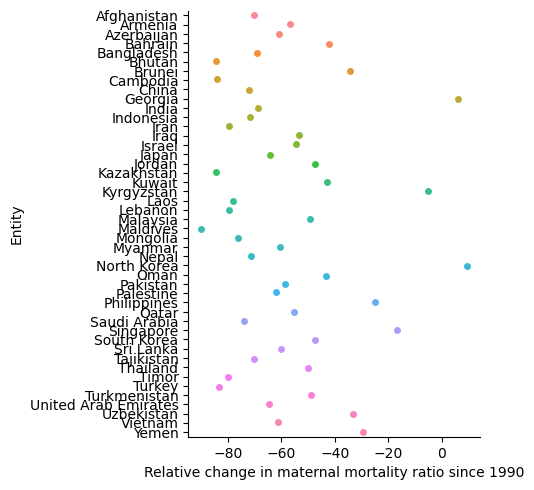

In [84]:
#data visualization for the Asian overall Motality Change over the years using the seaborns catplot
sns.catplot(data=df_Asia, x="Relative change in maternal mortality ratio since 1990", y="Entity")

In [96]:
#some simple inbuilt operations to know more about your data
print(df_Asia.min())
print()
print(df_Asia.max())
print()
print(df_Asia.info())
print()
print(df_Asia.describe())
print()
print(df_Asia.value_counts())

Entity                                                    Afghanistan
Code                                                              AFG
Year                                                             2015
Relative change in maternal mortality ratio since 1990     -89.955687
Continent                                                        Asia
dtype: object

Entity                                                       Yemen
Code                                                           YEM
Year                                                          2015
Relative change in maternal mortality ratio since 1990    9.333333
Continent                                                     Asia
dtype: object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 2 to 551
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity 

Web Scrapping & API

With growing interest in Morgan Stanley, I wanted to scrape its website and mainly parse through the Diversity webpage. 

How To web scrape?

1. Get the url link
2. request to get information from the link
3. parse through the links content using html.parser from BeautifulSoup if its an html or Json if its in json format
4. print the soup

In [136]:
# web scrapping and navigating websites 

#first get ther URL of the website you wanna scrape on
MS_url='https://www.morganstanley.com/'

# request to get the urls information
MS_resp= requests.get(MS_url)

#create a soup to parse on the whole websites content to later use ot to scrape
soup = BeautifulSoup(MS_resp.content, 'html.parser')
print(soup)


<!DOCTYPE HTML>

<html lang="en">
<head>
<script companyid="5136" src="https://c.evidon.com/dg/dg.js"></script>
<meta charset="utf-8"/>
<title>Morgan Stanley | Global Leader in Financial Services</title>
<!--meta data-sly-test.description="" name="description" content=""/-->
<!--meta data-sly-test.templateName="home-page-template" name="template" content=""/-->
<meta content="Discover how we help individuals, families, institutions and governments raise, manage and distribute the capital they need to achieve their goals." name="description"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="Morgan Stanley | Morgan Stanley" property="og:title"/>
<meta content="https://www.morganstanley.com/content/dam/msdotcom/en/story.jpg" property="og:image"/>
<meta content="Meet our people and discover our ideas." property="og:description"/>
<meta content="keywords" name="keywords"/>
<meta content="Morgan Stanley" property="og:site_name"/>
<meta content="https://w

How to get all the links present in the website? 
This is how we generate links but some links dont work because they have different abbrievations from the ones that are originally directed for the links, so it is a flaw of this technique.

In [42]:
#inspect from the website and get the link class for all the links present on the website
link_text=soup.find_all('a',{'class': "cmp-navigation__item-link" })

#create an iteration over all the links
for item in link_text:
    
    #
    name=item.text
    
    #syntax to lowercase it to allig with the link requirements
    lowercase=name.lower()
    
    #replace any whitespace with a - from the names of the links to connect it forthe link requirements
    link=lowercase.replace(' ','-')
    
    #get the newlink
    new_link= url+ link
    print(new_link)


https://www.morganstanley.com/investor-relations
https://www.morganstanley.com/media-relations
https://www.morganstanley.com/client-login
		--

https://www.morganstanley.com/client-login
https://www.morganstanley.com/morgan-stanley-online
https://www.morganstanley.com/stockplan-connect
https://www.morganstanley.com/research-portal
https://www.morganstanley.com/matrix
https://www.morganstanley.com/our-insights-
https://www.morganstanley.com/our-insights
https://www.morganstanley.com/personal-finance
https://www.morganstanley.com/market-trends
https://www.morganstanley.com/technology-&-disruption
https://www.morganstanley.com/sustainability
https://www.morganstanley.com/diversity-&-inclusion
https://www.morganstanley.com/what-we-do-
https://www.morganstanley.com/what-we-do
https://www.morganstanley.com/wealth-management
https://www.morganstanley.com/investment-banking-&-capital-markets
https://www.morganstanley.com/sales-&-trading
https://www.morganstanley.com/research
https://www.morgan

In [46]:
# parsing through the diversity website
diversity_url='https://www.morganstanley.com/diversity' # using the diversity link I generated in the previous code
diversity_res=requests.get(diversity_url)
soup=BeautifulSoup(diversity_res.content, 'html.parser')
soup


<!DOCTYPE html>

<html data-placeholder-focus="false" lang="en">
<head>
<!-- below is from default AEM JSP template -->
<title>Diversity &amp; Inclusion | Morgan Stanley
    </title>
<!-- NOTE: below is needed for "drag components here" to display properly -->
<script companyid="5136" src="https://c.evidon.com/dg/dg.js"></script>
<meta charset="utf-8"/>
<meta content="initial-scale=1, width=device-width" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Explore our commitment to diversity and inclusion for clients, employees, and communities that builds on our legacy and strengthens our business." name="description"/>
<meta content="Diversity &amp; Inclusion  | Morgan Stanley" property="og:title"/>
<meta content="https://www.morganstanley.com/about-us/diversity" property="og:image"/>
<meta content="Explore our commitment to diversity and inclusion for clients, employees, and communities that builds on our legacy and strengthens our busine

A simple web scrapping for how the company has taken initiatives to address diversity within Morgan Stanley
I am particularly interested in it being an international Student in the USA and having keen interest in working for Morgan Stanley, this will give me keyinsights on how the company treats its inetrnational or racial members

parse and inspect the website to get all the information notted in the website using the syntax below
since the I inspected the content of the Diversity webpage, I inspected it and it was its own grouped element (div)

In [50]:
diversity=soup.find_all('div',{"class":"content-wrapper -l"})
for item in diversity:
    print(item.text)


A Call to Action 
Chairman and Chief Executive Officer James P. Gorman outlines our efforts to champion racial equity and inclusion.
Read James Gorman's statement


The Institute for Inclusion
Our mission is to catalyze and accelerate an integrated and transparent strategy around diversity, equity, and inclusion in order to deliver the full potential of Morgan Stanley and drive meaningful change within our firm and beyond. 
About The Institute


Inclusive Ventures Group
Underrepresented entrepreneurs are the cutting-edge leaders of businesses that power markets. Hear their stories and learn about how we are transforming the investment landscape around the world.
Explore our programs and efforts


Advancing Racial Equity
At Morgan Stanley, advancing racial equity is about intentional, holistic change at the intersection of what we do as a company, in our global and local communities and as an inclusive workplace that values diversity. 
Learn More about how we  drive racial equity


Peo

API

How to work with APIs?

1.Get your API url
2.Requests to get the Sports URL 
3.Get the Json format to create a summarized version of your dataset
4.Print


In [140]:
#from my project 6 for CS Data Science Class
sports_url= 'https://api.the-odds-api.com/v4/sports?apiKey=1915ed783eace238eb39b0e4fa150578'
sports_response= requests.get(sports_url)
sports=sports_response.json()
sports

[{'key': 'americanfootball_ncaaf',
  'group': 'American Football',
  'title': 'NCAAF',
  'description': 'US College Football',
  'active': True,
  'has_outrights': False},
 {'key': 'americanfootball_nfl',
  'group': 'American Football',
  'title': 'NFL',
  'description': 'US Football',
  'active': True,
  'has_outrights': False},
 {'key': 'americanfootball_nfl_super_bowl_winner',
  'group': 'American Football',
  'title': 'NFL Super Bowl Winner',
  'description': 'Super Bowl Winner 2023/2024',
  'active': True,
  'has_outrights': True},
 {'key': 'aussierules_afl',
  'group': 'Aussie Rules',
  'title': 'AFL',
  'description': 'Aussie Football',
  'active': True,
  'has_outrights': False},
 {'key': 'baseball_mlb',
  'group': 'Baseball',
  'title': 'MLB',
  'description': 'Major League Baseball',
  'active': True,
  'has_outrights': False},
 {'key': 'baseball_mlb_world_series_winner',
  'group': 'Baseball',
  'title': 'MLB World Series Winner',
  'description': 'World Series Winner 2023',

Create a function to get the sport name from the Json we created before to create a link for easy access to different websites.

1.Define function


2.Create a list to store the main requorement for the link that is the name of the league to be attached with the url link.


3.Create iteration and conditionals according to get the link

In [138]:
def sport(sport_name):
    result=[]
    for item in sports:
        key=item['key']
        if sport_name in key:
            result.append(key)
    return result

In [139]:
#Soccer name generation example for General URL processing 

sport('soccer')

['soccer_argentina_primera_division',
 'soccer_australia_aleague',
 'soccer_austria_bundesliga',
 'soccer_belgium_first_div',
 'soccer_brazil_campeonato',
 'soccer_brazil_serie_b',
 'soccer_chile_campeonato',
 'soccer_china_superleague',
 'soccer_conmebol_copa_libertadores',
 'soccer_denmark_superliga',
 'soccer_efl_champ',
 'soccer_england_league1',
 'soccer_england_league2',
 'soccer_epl',
 'soccer_fa_cup',
 'soccer_france_ligue_one',
 'soccer_france_ligue_two',
 'soccer_germany_bundesliga',
 'soccer_germany_bundesliga2',
 'soccer_germany_liga3',
 'soccer_italy_serie_a',
 'soccer_italy_serie_b',
 'soccer_japan_j_league',
 'soccer_korea_kleague1',
 'soccer_league_of_ireland',
 'soccer_netherlands_eredivisie',
 'soccer_norway_eliteserien',
 'soccer_poland_ekstraklasa',
 'soccer_portugal_primeira_liga',
 'soccer_spain_la_liga',
 'soccer_spain_segunda_division',
 'soccer_spl',
 'soccer_sweden_allsvenskan',
 'soccer_sweden_superettan',
 'soccer_switzerland_superleague',
 'soccer_turkey_su

Other way to get URL.

1. Get the url
2. Combine the url with the sport name and then return it

In [141]:
def get_url(sport):
    baseurl='https://api.the-odds-api.com/v4/sports/'
    odds='/odds/?apiKey=1915ed783eace238eb39b0e4fa150578&regions=us&markets=h2h,spreads&oddsFormat=american'
    url=baseurl + sport +odds
    return url

In [142]:
get_url('soccer_epl')

'https://api.the-odds-api.com/v4/sports/soccer_epl/odds/?apiKey=1915ed783eace238eb39b0e4fa150578&regions=us&markets=h2h,spreads&oddsFormat=american'